## Created by Joshua Ostaszewski and used in Ostaszewski et al. 2024.

### A semi-objective approach to find reflectivity angles and reflectivity gradient angles.

In [1]:
import cartopy.crs as ccrs 
import cartopy.feature as cfeature

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pyart;
import math
from functions_radar import get_radar_from_aws
import pandas as pd

def find_nearest(array, value):
    array = np.asarray(array)
    return (np.abs(array-value)).argmin()


plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('axes', titlesize=22, labelsize=15)

# HD baybeeeeee
%config InlineBackend.figure_format='retina'


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\numpy\__init__.py:10: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _nlv = LooseVersion(_np_version)
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\numpy\__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p14 = _nlv < LooseVersion("1.14")
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\numpy\__init__.py:12: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p15 = _nlv < LooseVersion("1.15")
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\numpy\__init__.py:13: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _np_version_under1p16 = _nlv < LooseVersion("1.16")
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\numpy\__

In [2]:
### functions

def get_radar_subset(radar, xsn, ysn, station, box_radius=30):
    
    ''' Get a reflectivity subset around a given radar-relative location. 
    
    INPUTS
    radar:      radar object 
    xsn:        radar-relative sticknet position in meters
    ysn:        radar-relative sticknet poisition in meters
    station:    radar site ID
    box_radius: size of initial subset (square with side length box_radius*2)
    
    OUTPUT: x grid (2D, meters), y grid (2D, meters), reflectivity (2D)'''
    
    # grid the data
    # 1 km resolution... see the pyart docs to change this 
    # radars are indexed to form a box over the 2016/2017 Stesonet domain
    #IOP2
#     if station == 'KLZK':
#         grid = pyart.map.grid_from_radars(radar,(10,210,230), ((0,10000), (-160000 ,50000), (20000,210000)))
        
        
    #IOP4
    if station == 'KHTX':
        grid = pyart.map.grid_from_radars(radar, (10,190,250), ((0,10000), (-100000,90000), (-210000,-40000)))


    #IOP5
#     if station == 'KNQA':
#         grid = pyart.map.grid_from_radars(radar, (10,190,220), ((0,10000), (-50000,140000), (-160000,60000)))
    
    x, y = grid.x['data'], grid.y['data']

    box = box_radius # 30 => 60 km length box

    sn_x = find_nearest(xsn, grid.x['data'])
    sn_y = find_nearest(ysn, grid.y['data'])

    x_subset = x[sn_x-box:sn_x+box]
    y_subset = y[sn_y-box:sn_y+box]
    ref_subset = grid.fields['reflectivity']['data'][0,sn_y-box:sn_y+box, sn_x-box:sn_x+box]
    
    return x_subset, y_subset, ref_subset

def get_radar_loc(station):
    ''' get the lat and lon location of each radar.
    This data is available in the radar object metadata. '''
    
    if station == 'KLZK':
        radar_lat, radar_lon = 34.8364, -92.2622
    if station == 'KHTX':
        radar_lat, radar_lon = 34.9306, -86.0833
    if station == 'KNQA':
        radar_lat, radar_lon = 35.3447, -89.8733
        
    return radar_lat, radar_lon  

def get_dxdy(lat1, lon1, lat2, lon2):
    '''Finds the distance in meters between two lat/lon points '''
    
    dx = (lon1-lon2)*40000*math.cos((lat1+lat2)*math.pi/360)/360
    dy = (lat1-lat2)*40000/360
    return dx*1000, dy*1000 # meters

In [3]:
SNSfile = 'E:\\PERiLS_Y2\\Excel_SN\\Before_CPA\\PERiLS_IOP4Y2_thermo.xlsx' #Change to file with SN metadata and approximate cold pool TOA
sns = pd.read_excel(SNSfile)
sns = sns[sns['TOA_coldpool_final'].notna()]

C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\compat\_optional.py:99: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(version) < minimum_version:
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\xlrd\xlsx.py:39: DeprecationWarning: defusedxml.cElementTree is deprecated, import from defusedxml.ElementTree instead.
  try: import defusedxml.cElementTree as ET
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` h

In [4]:
sns

C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pandas\core\indexes\base.py:395: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data

,IOP,date,ID,lat,lon,array_type,mode,MC_rel_toa,type,tor,...,TOA_coldpool_final,TOA_mods,Threshold,U,V,ref_angle,ref_contour,SM_mods,ref_mods,BS_mods
0,4,2023-03-31,101A,34.5838,-87.5469,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0713,-2.0,-3.0,32.5,5.4,-29.5,40.0,NaN,NaN,NaN
1,4,2023-03-31,102A,34.6549,-87.3479,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0731,-2.0,-3.0,35.3,5.9,-32.2,44.0,NaN,NaN,NaN
2,4,2023-03-31,103A,34.6175,-87.1015,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0750,-4.0,-3.0,38.1,8.8,-43.8,40.0,NaN,NaN,NaN
3,4,2023-03-31,104A,34.5273,-87.2914,Fine,Mesocyclone,NaN,R,NT,...,4/1/2023 0740,-1.0,-3.0,40.1,8.6,-34.8,40.0,NaN,NaN,NaN
4,4,2023-03-31,105A,34.9130,-87.5156,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0700,-1.0,-3.0,39.2,6.0,-61.9,40.0,NaN,NaN,NaN
5,4,2023-03-31,106A,34.9000,-87.8161,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0640,NaN,-3.0,33.0,3.0,-46.6,40.0,NaN,NaN,NaN
6,4,2023-03-31,107A,34.5932,-87.9309,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0628,-4.0,-3.0,37.2,5.7,-35.8,40.0,NaN,NaN,NaN
8,4,2023-03-31,109A,34.7967,-87.0036,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0736,NaN,-2.0,39.0,9.0,-33.3,37.0,NaN,NaN,NaN
9,4,2023-03-31,110A,34.8437,-87.2747,Coarse,Mesocyclone,NaN,R,NT,...,4/1/2023 0753,NaN,-3.0,41.1,14.7,-56.9,34.0,NaN,NaN,NaN
10,4,2023-03-31,111A,34.4943,-87.2925,Fine,Mesocyclone,NaN,R,NT,...,4/1/2023 0742,-2.0,-3.0,40.1,8.6,-43.8,40.0,NaN,NaN,NaN


Getting Radar Subset for 224A...
77 77


C:\Users\joshu\.conda\envs\unidata\lib\site-packages\pyart\map\gates_to_grid.py:169: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  " to Barnes2 on June 1st.", DeprecationWarning)
C:\Users\joshu\.conda\envs\unidata\lib\site-packages\ipykernel_launcher.py:81: UserWarning: The following kwargs were not used by contour: 'label'


-63.55552992598731 116.44447007401268
Finished Plotting to Folder and Adding Data in Excel Doc for 224A


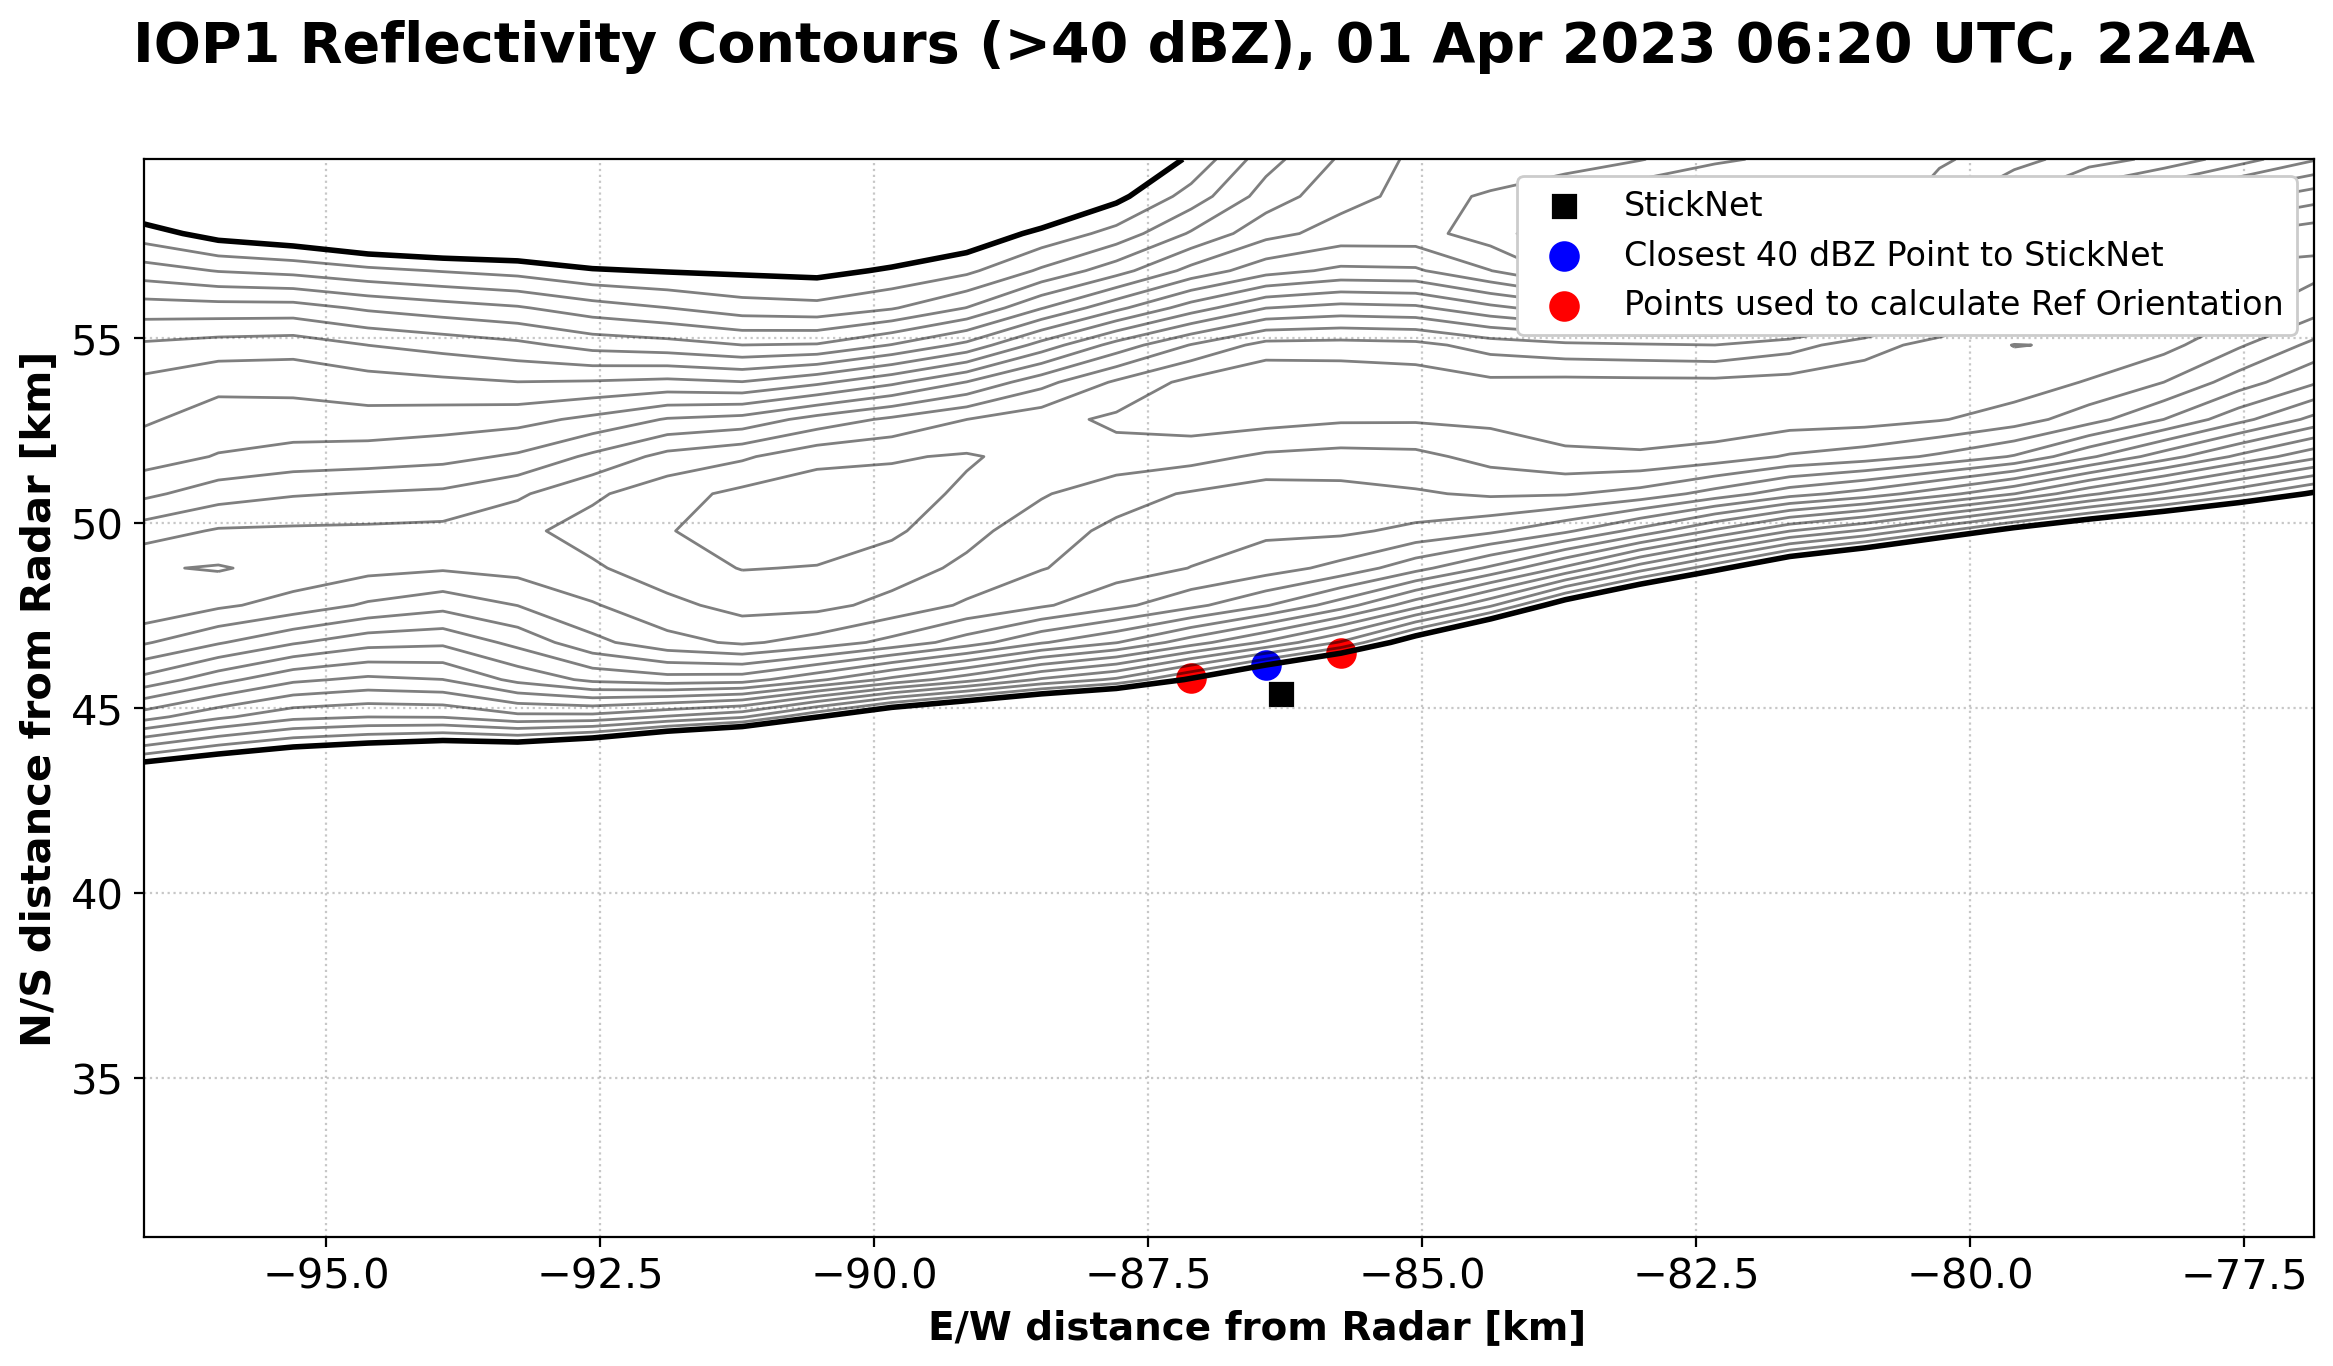

In [5]:
### For each SN, used gridded reflectivity data nearest the cold pool TOA

for i in [sns.index[22]]:
    # unpack data
    sticknet = sns.loc[i]['ID']
    TOA = pd.to_datetime(sns.loc[i]['TOA_coldpool_final'])
    SN_lat = sns.loc[i]['lat']
    SN_lon = sns.loc[i]['lon']

    # nearest Radar site
    station='KHTX'

    #####################################
    print('Getting Radar Subset for '+sticknet+'...')

    # find two different times around TOA
    analysis_time1 = TOA
    analysis_time2 = TOA

    # find location of radar
    radar_lat, radar_lon = get_radar_loc(station)   

    # find the distance between the sticknet and radar
    xsn, ysn = get_dxdy(SN_lat, SN_lon, radar_lat, radar_lon)

    # get radar data 
    radar_namelist1, radar_list1 = get_radar_from_aws(station, analysis_time1, analysis_time2)
    
    radar1 = radar_list1[0]

    # get reflectivity subset around sticknet
    x, y, ref1 = get_radar_subset(radar1, xsn, ysn, station)
    
    # pull the radar scan times
    time1 = dt.datetime.strptime(radar1.time['units'][-20:], '%Y-%m-%dT%H:%M:%SZ')
    
    # set the box radius
    # this is the box that gets moved around to figure out storm motion 
    # the inital subset box is 60 km (30-km radius), so to get a box of 10 km (5-km radius), 
    # subtract desired radius (5) from 30
    box_radius = 30-15
    # make sure that box radius isn't too large, otherwise you'll run out of data in the initial 60 km box


    # find the storm motion!
    # xbest is the xshift, ybest is the yshift, and U and V is the storm motion
    # plot it!

    ## plot >30 dbz countours to make sure the result makes sense 

    fig, axes = plt.subplots(figsize=(14,7), sharey=True)

    ############################################
    ### Plot from BEFORE grid shift 

    # get x and y grids
    xx, yy = np.meshgrid(x[box_radius:-box_radius]/1000, y[box_radius:-box_radius]/1000)

    # subset velocity before shift 
    r1 = ref1[box_radius:-box_radius, box_radius:-box_radius]

    # plot 
    # thin - every 5 dbz
    axes.contour(xx, yy, r1, colors='k', levels = np.arange(40,70,1), alpha=0.5, linewidths=1)

    # plot details
    plt.subplots_adjust(wspace=0.05)

    # add labels 
    axes.set_ylabel('N/S distance from Radar [km]', weight='bold')
    plt.text(0.405, 0.038, 'E/W distance from Radar [km]', fontsize=14, weight='bold', transform = fig.transFigure)

    # add grid and sticknet location
    axes.grid(ls=':', alpha=0.7)
    axes.scatter(xsn/1000, ysn/1000, marker='s', color='k', edgecolor='w', linewidth=1, s=100, label='StickNet')

    # add left side of Title
    date = time1.strftime('%d %b %Y %H:%M UTC')
    plt.suptitle('IOP1 Reflectivity Contours (>40 dBZ), '+ f'{date}, {sticknet}', fontsize=20, weight='bold') ;
    
    CS1 = axes.contour(xx, yy, r1, colors='k', levels = np.arange(40,41,1), alpha=1, linewidths=2, label='40 dBZ contour')
    p = CS1.collections[0].get_paths()[0]#change
    v = p.vertices
    x = v[:,0]
    y = v[:,1]
    
    test = list(zip(x,y))
    testing = (xsn/1000,ysn/1000)
    nearest = min(test,key=lambda c: (c[0]- testing[0])**2 + (c[1]-testing[1])**2)#DO NOT CHANGE
    xxx = np.where(x==nearest[0])[0][0]
    yyy = np.where(y==nearest[1])[0][0]

    axes.scatter(x[xxx],y[xxx],color='b',linewidth=1, s=100, label='Closest 40 dBZ Point to StickNet')
    axes.scatter(x[xxx+1],y[xxx+1],color='r',linewidth=1, s=100, label='Points used to calculate Ref Orientation')
    axes.scatter(x[xxx-1],y[xxx-1],color='r',linewidth=1, s=100)
    
    dy = y[xxx+1]-y[xxx-1]
    dx = x[xxx+1]-x[xxx-1]
    print(np.rad2deg(np.arctan(dy/dx))-90,np.rad2deg(np.arctan(dy/dx))+90)
    
    axes.legend(fontsize=12, framealpha=1)

#    fig.savefig('E:\\PERiLS_Y2\\methods\\ref_angle\\IOP4\\'+sticknet+'.png', format='png',bbox_inches='tight')
    #plt.close()
    print('Finished Plotting to Folder and Adding Data in Excel Doc for '+sticknet)

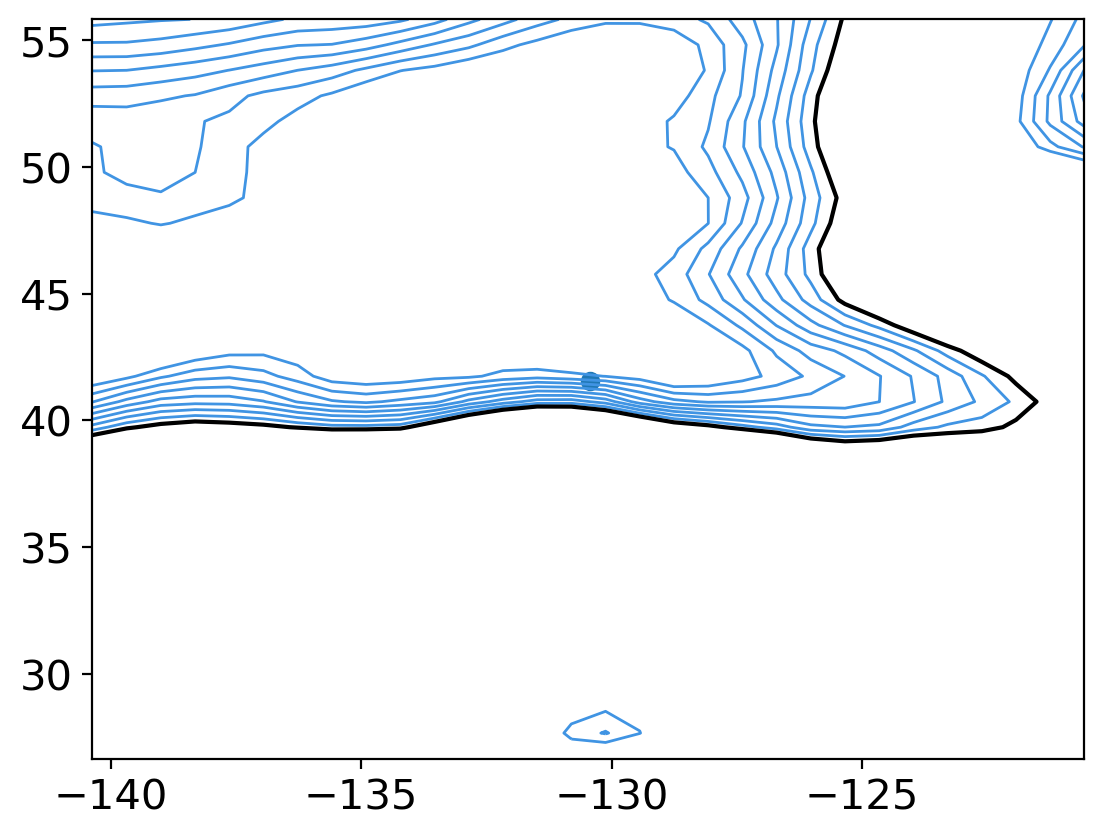

In [7]:
#Use above gridded reflectivity and find reflectivity contour to do analysis on.

CS1 = plt.contour(xx, yy, r1, colors='#4094e3', levels = np.arange(40,49,1), alpha=1, linewidths=1)
#CS1 = plt.contour(xx, yy, v1, colors='#4094e3', levels = np.arange(0,40,1), alpha=1, linewidths=1)

p = CS1.collections[0].get_paths()[0]#change
v = p.vertices
x = v[:,0]
y = v[:,1]

# p1 = CS1.collections[0].get_paths()[2]#change
# v1 = p1.vertices
# x1 = v1[:,0]
# y1 = v1[:,1]


plt.plot(x,y,'k')

#plt.plot(x1,y1,'r')
plt.scatter(xsn/1000,ysn/1000)

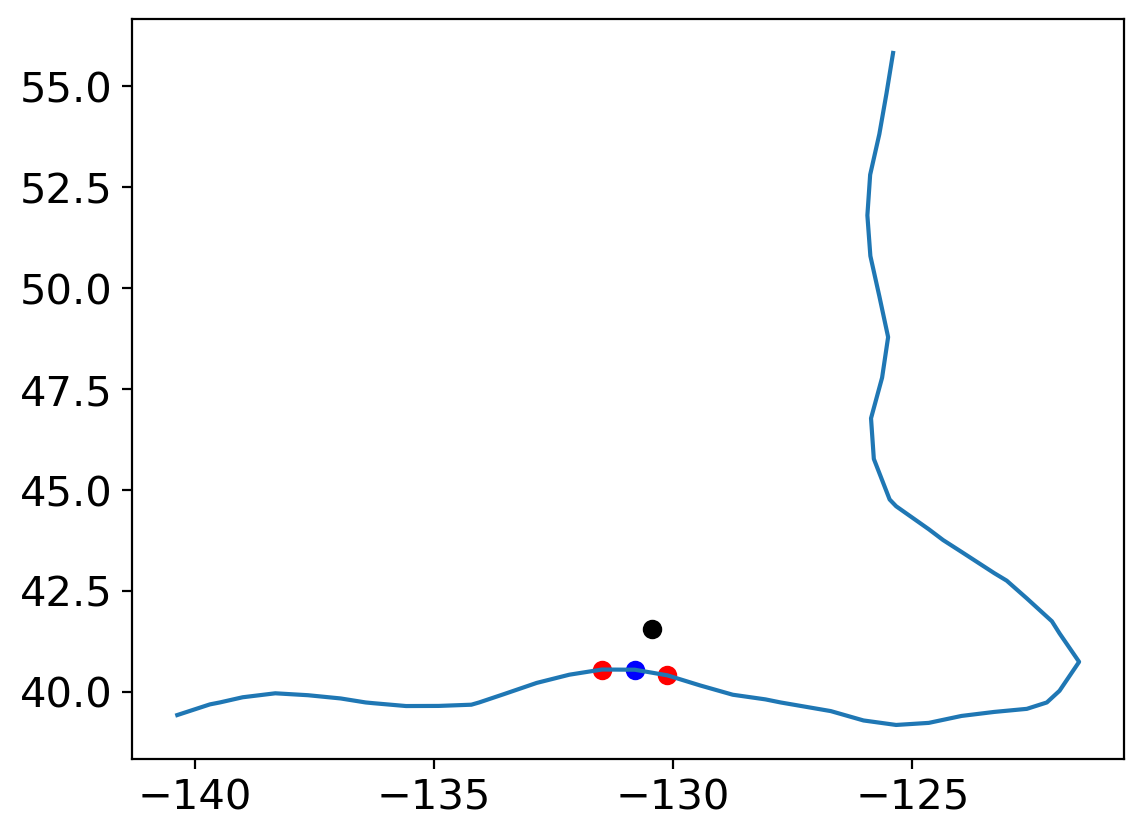

In [8]:
#Use above contour and find the "best" representative reflectivity angle

test = list(zip(x,y))
testing = (xsn/1000,ysn/1000)
nearest = min(test,key=lambda c: (c[0]- testing[0])**2 + (c[1]-testing[1])**2)#DO NOT CHANGE
xxx = np.where(x==nearest[0])[0][0]
yyy = np.where(y==nearest[1])[0][0]

plt.plot(x,y)
plt.scatter(xsn/1000,ysn/1000,color='k')
plt.scatter(x[xxx],y[xxx],color='b')
plt.scatter(x[xxx+1],y[xxx+1],color='r')
plt.scatter(x[xxx-1],y[xxx-1],color='r')

In [9]:
# Calculate reflectivity gradient angle using above reflectivity angle

dy = y[xxx+1]-y[xxx-1]
dx = x[xxx+1]-x[xxx-1]
np.rad2deg(np.arctan(dy/dx))+90 #Gradient (H to L), Orientation: SW/NE -90, SE/NW +90

83.96947020992765